In [1]:

import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt

file = os.path.join(r'p:\11209905-dca-sfincs-river\00_data\05-02-2024_Koldingaa\05-02-2024\Kolding_å_2018.txt')

# Assuming your data is in a file named 'your_file.txt'
with open(file, 'r', encoding='latin-1') as file:
    lines = file.readlines()

all_profiles = []
current_profile = []


{'ID': 7.0}


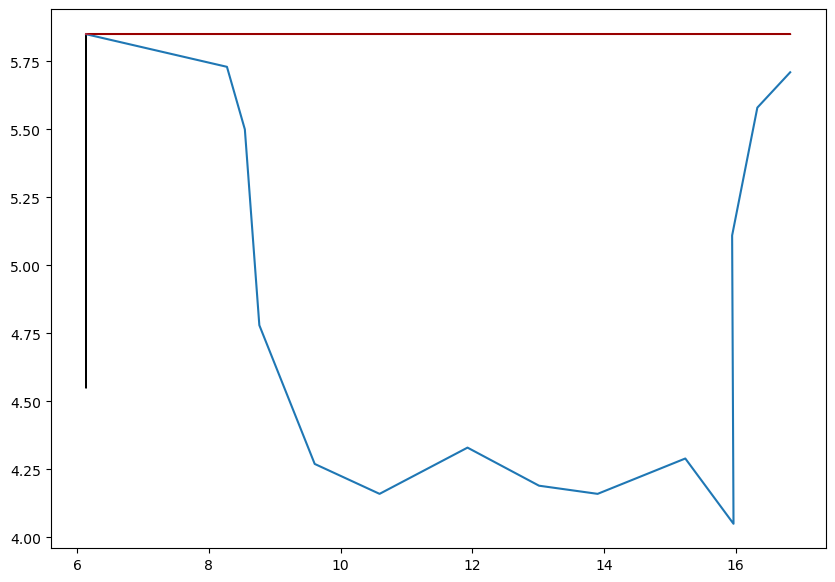

In [2]:

for line_id, line in enumerate(lines[:10]):
    if line.startswith("Kolding Å"):

        id_profile= float(lines[line_id+1].split()[-1])
        current_profile = {"ID": id_profile}
        print(current_profile)

    if line.startswith("PROFILE"):

        number_of_points = int(line.split()[-1])
        coor_x = []
        depth = []

        data = lines[line_id + 1 : line_id + 1 + number_of_points]

        for line_sub_id, line_sub in enumerate(data):

            if line_sub.split()[-1] == "<1>":
                start_id = int(line_sub_id)

            if line_sub.split()[-1] == "<4>":
                end_id = int(line_sub_id)


        for idx_wet in np.arange(start_id, end_id + 1):


            coor_x.append(float(data[idx_wet].split()[0]))
            depth.append(float(data[idx_wet].split()[1]))


        fig, ax = plt.subplots(1,1, figsize = (10,7))
        plt.plot(coor_x, depth)
        #print(current_profile)

        width = coor_x[-1] - coor_x[0]
        average_depth = np.mean(depth)
        
        plt.plot([coor_x[0], coor_x[-1]], [depth[0], depth[0]], color = 'red', alpha = 0.6)
        plt.arrow(coor_x[0],depth[0], dx= width , dy= 0)
        plt.arrow(coor_x[0],depth[0], dx= 0 , dy= average_depth - coor_x[0])

        current_profile = {"ID": id_profile, "crossshore_x": coor_x, "depth": depth, "width":width, "average_depth": average_depth}

    all_profiles.append(current_profile)



    



    # elif line.strip() == "****":
    #     # End of a profile, add it to the data
    #     data.append(current_profile)
    # else:
    #     # Process coordinates and values
    #     values = list(map(float, line.split()))
    #     current_profile["Coordinates"].append(values)
    

In [35]:
len(all_profiles)

3856